# Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt, matplotlib.cm as cm
from collections import deque
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Data Loading

In [ ]:
data1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/dbscan_dataset_1.csv")
print("Shape of dataset 1 = ", data1.shape)

data2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/dbscan_dataset_2.csv")
print("Shape of dataset 2 = ", data2.shape)

Shape of dataset 1 =  (300, 4)
Shape of dataset 2 =  (700, 4)


In [ ]:
data1 = data1.drop("Unnamed: 0", axis=1)
print("Shape of dataset 1 after dropping column = ", data1.shape)

data2 = data2.drop("Unnamed: 0", axis=1)
print("Shape of dataset 2 after dropping column = ", data2.shape)

Shape of dataset 1 after dropping column =  (300, 3)
Shape of dataset 2 after dropping column =  (700, 3)


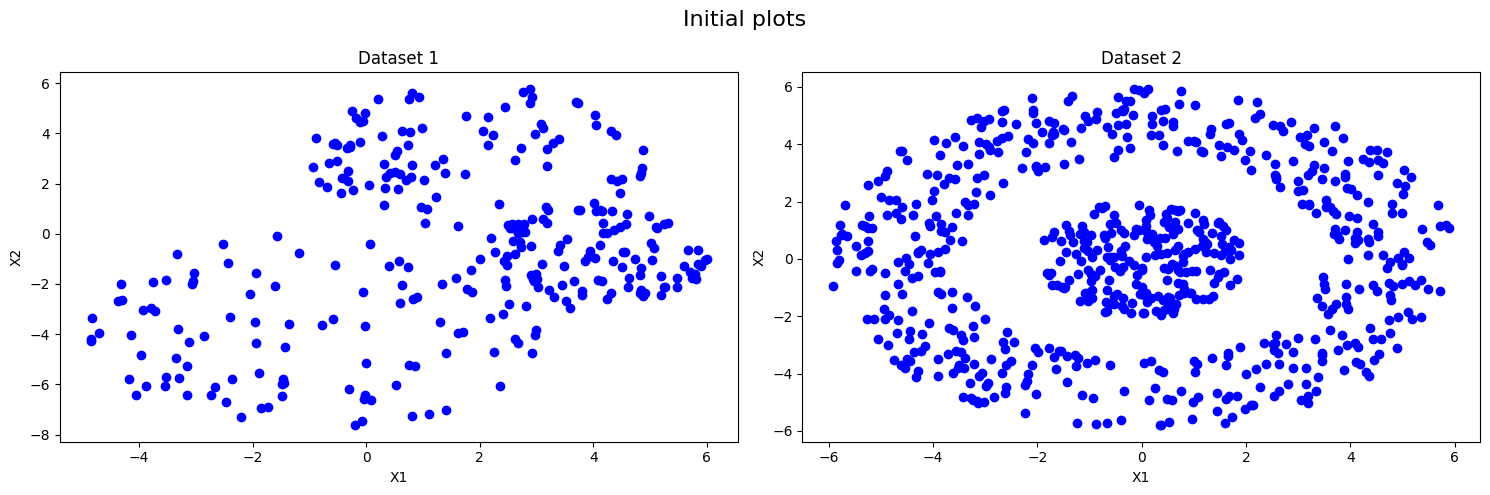

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle("Initial plots", fontsize=16)

axes[0].scatter(data1['x1'], data1['x2'], c='blue')
axes[0].set_title('Dataset 1')
axes[0].set_xlabel('X1')
axes[0].set_ylabel('X2')

axes[1].scatter(data2['x1'], data2['x2'], c='blue')
axes[1].set_title('Dataset 2')
axes[1].set_xlabel('X1')
axes[1].set_ylabel('X2')

plt.tight_layout()
plt.show()

# Algorithm

In [ ]:
class MyDBSCAN:
  def __init__(self, eps, min_pts):
    self.eps = eps
    self.min_pts = min_pts

  def fit(self, X):
      X = np.array(X)
      n_points = X.shape[0]

      self.labels_ = np.zeros(n_points, dtype=int)
      cluster_id = 0

      for i in range(n_points):
        if self.labels_[i] != 0: # already visited, skip it
          continue

        neighbors = self._get_neighbours(X, i)

        if len(neighbors) < self.min_pts:
          self.labels_[i] = -1 # noise
        else:
          cluster_id += 1 # core
          self._expand_cluster(X, i, neighbors, cluster_id)

      return self.labels_

  def _expand_cluster(self, X, core_point_idx, neighbors, cluster_id):
      self.labels_[core_point_idx] = cluster_id

      queue = deque(neighbors)

      while queue:
        current_point_idx = queue.popleft()

        if self.labels_[current_point_idx] == -1:
          self.labels_[current_point_idx] = cluster_id

        elif self.labels_[current_point_idx] == 0:
          self.labels_[current_point_idx] = cluster_id
          new_neighbors = self._get_neighbours(X, current_point_idx)

          if len(new_neighbors) >= self.min_pts:
            queue.extend(new_neighbors)


  def _euclidean_distance(self, x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

  def _get_neighbours(self, X, i):
    neighbours = []
    for j in range(len(X)):
      if self._euclidean_distance(X[i], X[j]) <= self.eps:
        neighbours.append(j)
    return list(neighbours)

# Outputs

In [ ]:
scaler = StandardScaler()
data1_scaled = scaler.fit_transform(data1.drop('y',axis=1))
data2_scaled = scaler.fit_transform(data2.drop('y',axis=1))

In [ ]:
model = MyDBSCAN(eps=0.3, min_pts=5)
cluster1 = model.fit(data1_scaled)
cluster2 = model.fit(data2_scaled)

In [ ]:
def plot(data1, data2, cluster1, cluster2, suptitle="Results"):
  cmap = plt.get_cmap('tab20b')

  fig, axes = plt.subplots(1, 2, figsize=(15, 5))
  fig.suptitle(suptitle, fontsize=16)

  unique_labels1 = np.unique(cluster1)
  colors1 = cmap(np.linspace(0, 1, len(unique_labels1)))
  color_map1 = {label: color for label, color in zip(unique_labels1, colors1)}

  for label in unique_labels1:
      subset = data1[cluster1 == label]
      if label == -1:
          legend_label = 'Noise'
      else:
          legend_label = f'Cluster {label}'

      axes[0].scatter(subset['x1'], subset['x2'], c=[color_map1[label]], label=legend_label)

  axes[0].set_title('Dataset 1')
  axes[0].set_xlabel('X1')
  axes[0].set_ylabel('X2')
  axes[0].legend()

  unique_labels2 = np.unique(cluster2)
  colors2 = cmap(np.linspace(0, 1, len(unique_labels2)))
  color_map2 = {label: color for label, color in zip(unique_labels2, colors2)}

  for label in unique_labels2:
      subset = data2[cluster2 == label]
      if label == -1:
          legend_label = 'Noise'
      else:
          legend_label = f'Cluster {label}'

      axes[1].scatter(subset['x1'], subset['x2'], c=[color_map2[label]], label=legend_label)

  axes[1].set_title('Dataset 2')
  axes[1].set_xlabel('X1')
  axes[1].set_ylabel('X2')
  axes[1].legend()

  plt.tight_layout()
  plt.show()

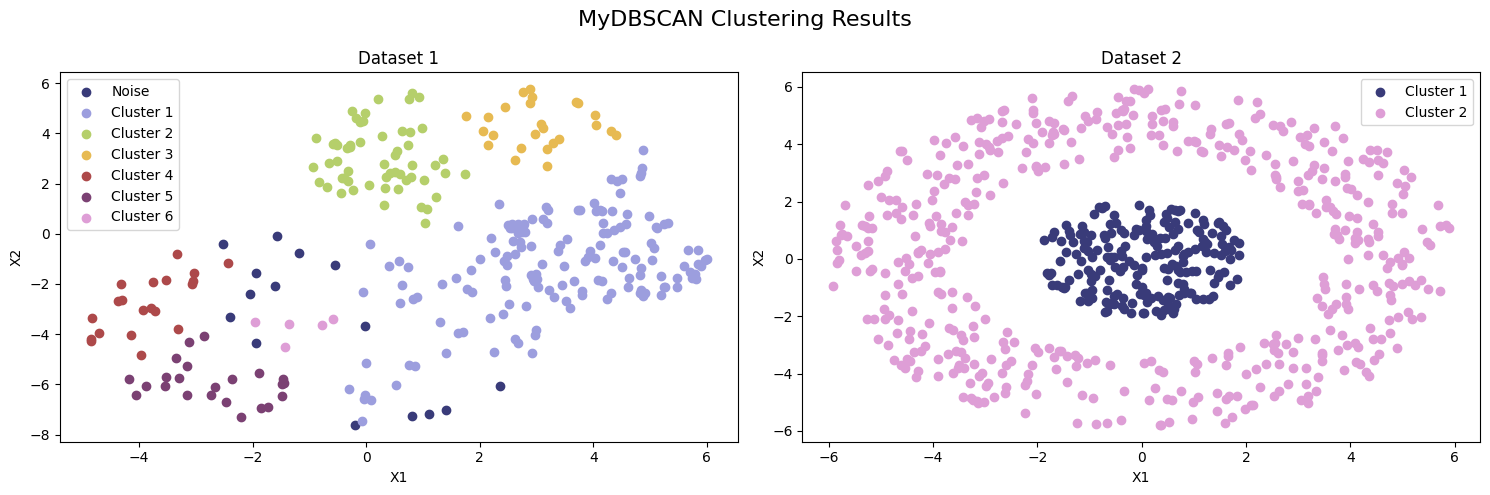

In [ ]:
plot(data1, data2, cluster1, cluster2, suptitle="MyDBSCAN Clustering Results")

# Sklearn

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
db1 = DBSCAN(eps=0.3, min_samples=5)
db2 = DBSCAN(eps=0.3, min_samples=5)

cluster_1 = db1.fit_predict(data1_scaled)
cluster_2 = db2.fit_predict(data2_scaled)

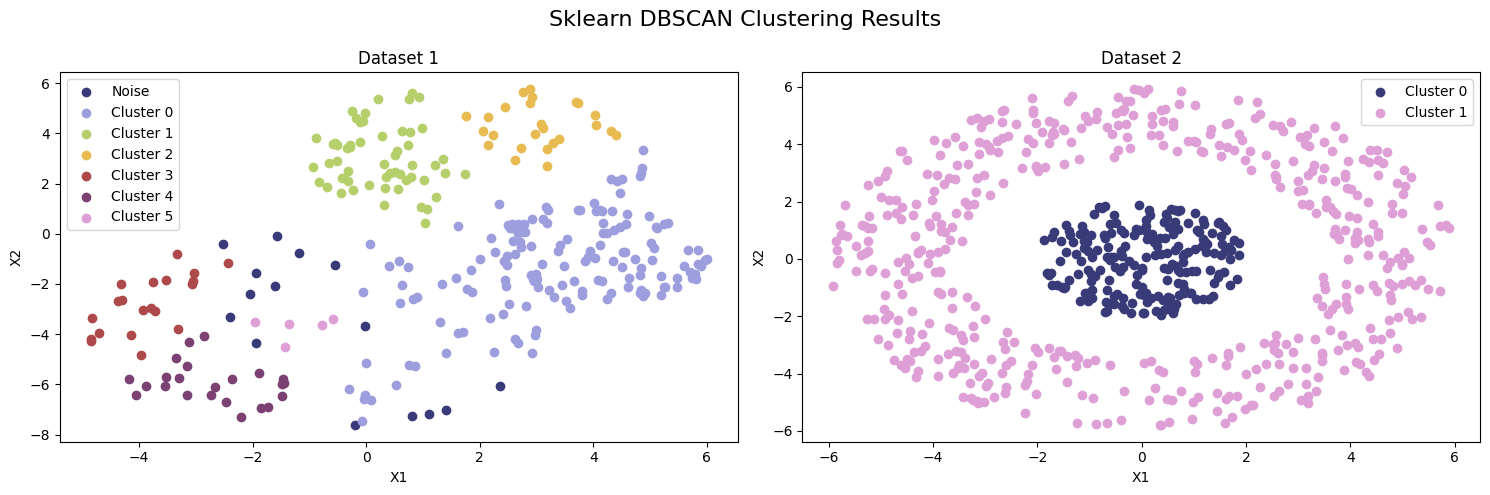

In [ ]:
plot(data1, data2, cluster_1, cluster_2,suptitle="Sklearn DBSCAN Clustering Results")